In [1]:
!date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

Sun Jul 19 14:08:36 CEST 2020


!pip3 install --user kaggle

In [4]:
train_1 = pd.read_csv('train_1.csv')
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
train = train_1[train_1.Page == '1918_flu_pandemic_en.wikipedia.org_all-access_all-agents']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
37215,1918_flu_pandemic_en.wikipedia.org_all-access_...,1624.0,1577.0,1464.0,1404.0,1521.0,1606.0,1513.0,1668.0,1457.0,...,2124.0,2094.0,2102.0,2244.0,2470.0,2985.0,3453.0,3704.0,4011.0,4244.0


In [73]:
train.to_csv('1918_flu_pandemic_data.csv', index = False)

In [8]:
train_long = train.melt( )
train_long= train_long.iloc[1:,]
train_long.columns = ['date', 'visits']
train_long.date = pd.to_datetime(train_long.date)
train_long.set_index('date', inplace = True)

train_long.visits = train_long.visits.astype('int')
train_long.head()

,visits
date,
2015-07-01,1624
2015-07-02,1577
2015-07-03,1464
2015-07-04,1404
2015-07-05,1521


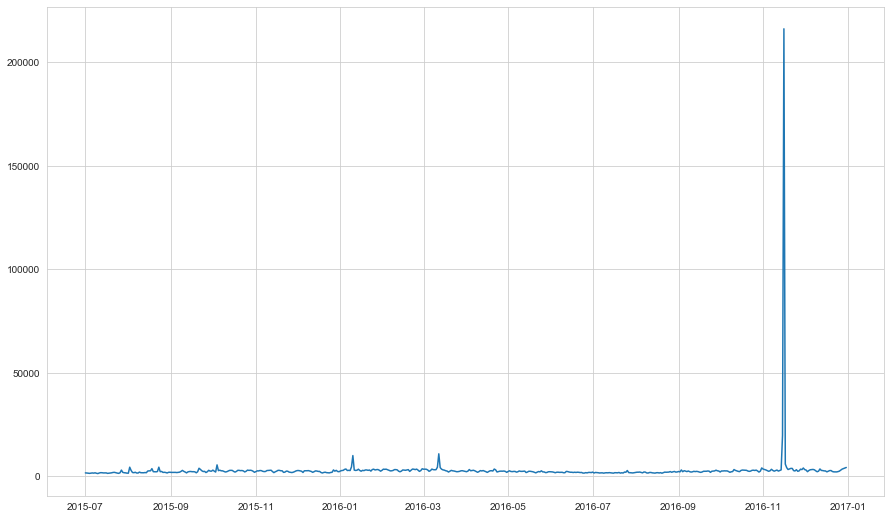

In [9]:
plt.figure(figsize = (15,9))
plt.plot(train_long)

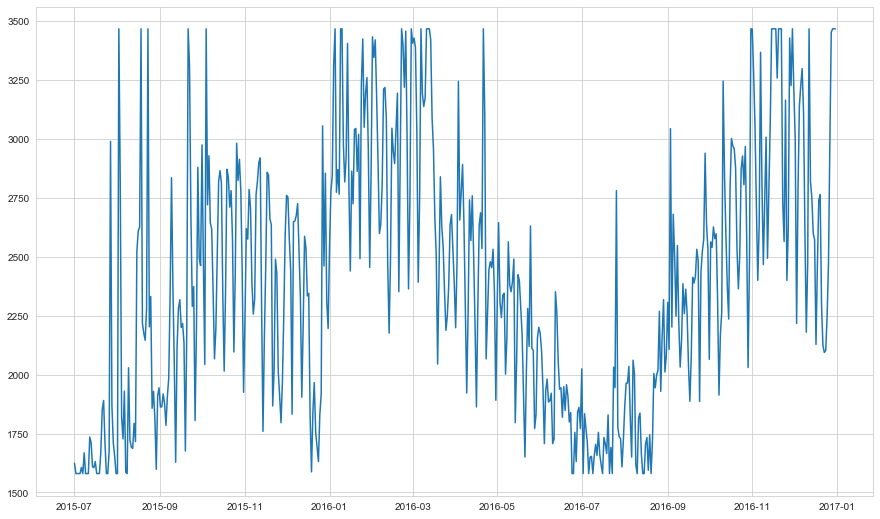

In [10]:
quantile_max = int(train_long['visits'].quantile(.95))
quantile_min = int(train_long['visits'].quantile(.05))
train_long['visits'] = np.clip(train_long['visits'], quantile_min, quantile_max)
plt.figure(figsize = (15,9))
plt.plot(train_long)

In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries['visits'].rolling(window = 30).mean()
    movingStd = timeseries['visits'].rolling(window = 30).std()
    
    #plot rolling statistics: 
    plt.figure(figsize = (15,9))
    org = plt.plot(timeseries['visits'], color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    sdt = plt.plot(movingStd, color = 'green', label = 'Rolling Std')
    plt.legend (loc = 'best')
    plt.title ('Rolling Mean & Standard Deviation')
    
    #Perform Dickey-Fuller test: 
    print('Results of Dickey-Fuller Test with AIC:')
    dftest = adfuller(timeseries['visits'], autolag = 'AIC')
    dfoutput = pd.Series (dftest [0:4],index = ['Test Statistics', 'p-value', 'Lags Used', 'Number of Obs Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
    
    if (dfoutput[0]< dfoutput[4])|(dfoutput[0]<dfoutput[5])|(dfoutput[0]<dfoutput[6]):
        print ('The data is stationary')
    else: 
        print('The data is not stationary')

Results of Dickey-Fuller Test with AIC:
Test Statistics          -2.176591
p-value                   0.214851
Lags Used                13.000000
Number of Obs Used      536.000000
Critical Value (1%)      -3.442609
Critical Value (5%)      -2.866947
Critical Value (10%)     -2.569650
dtype: float64
The data is not stationary


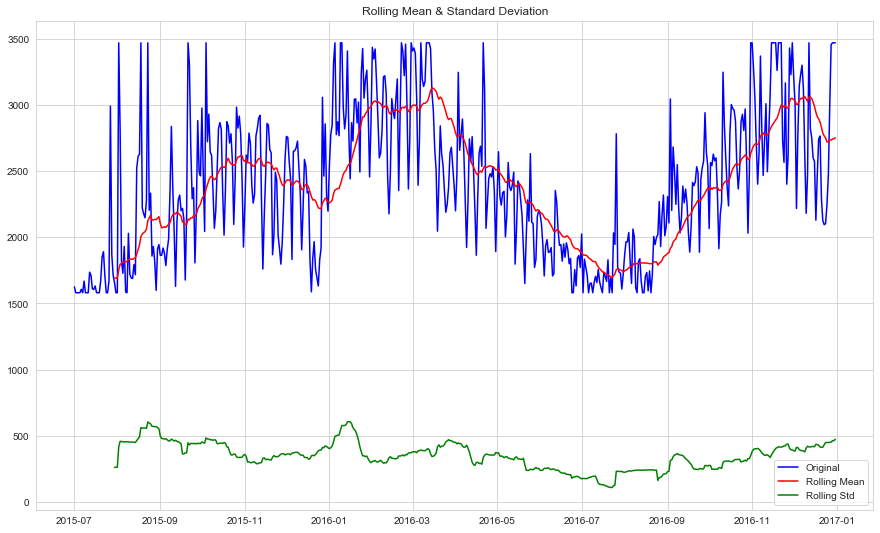

In [12]:
test_stationarity(train_long)

Results of Dickey-Fuller Test with AIC:
Test Statistics        -7.499701e+00
p-value                 4.285868e-11
Lags Used               1.600000e+01
Number of Obs Used      5.270000e+02
Critical Value (1%)    -3.442820e+00
Critical Value (5%)    -2.867040e+00
Critical Value (10%)   -2.569699e+00
dtype: float64
The data is stationary


<Figure size 1080x648 with 0 Axes>

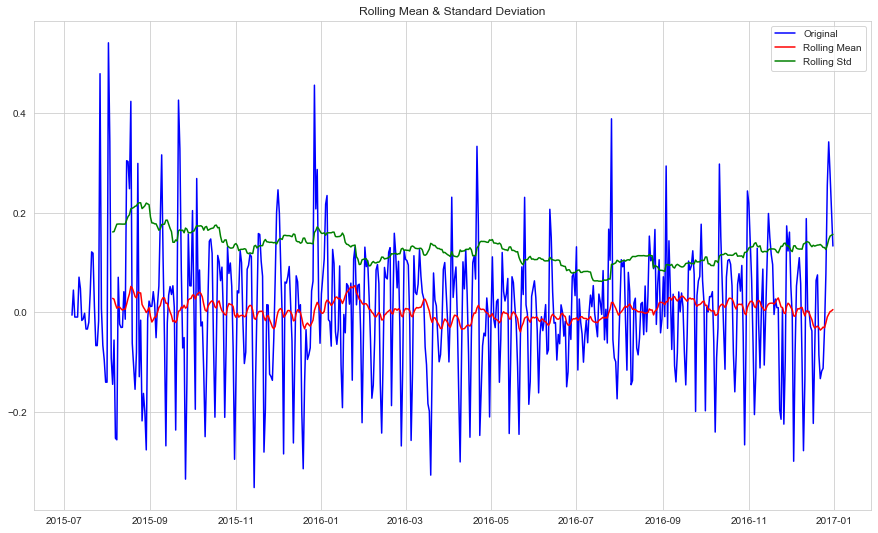

In [13]:
scaler_output = np.log(train_long[['visits']])
movingAverage = scaler_output.rolling(window = 7).mean()
scaler_output_log_minus_MA = (scaler_output- movingAverage).dropna()
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output
plt.figure(figsize = (15,9))
test_stationarity(scaler_output_log_minus_MA)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

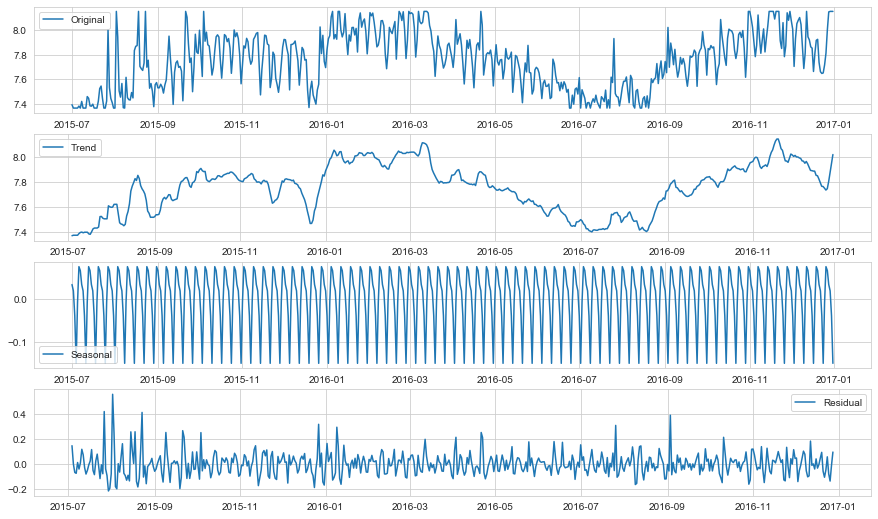

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(scaler_output)
plt.figure(figsize = (15,9))

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(scaler_output, label = 'Original')
plt.legend (loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend (loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend (loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend (loc = 'best')
plt.tight_layout

Results of Dickey-Fuller Test with AIC:
Test Statistics        -9.899808e+00
p-value                 3.381384e-17
Lags Used               1.900000e+01
Number of Obs Used      5.240000e+02
Critical Value (1%)    -3.442891e+00
Critical Value (5%)    -2.867072e+00
Critical Value (10%)   -2.569716e+00
dtype: float64
The data is stationary


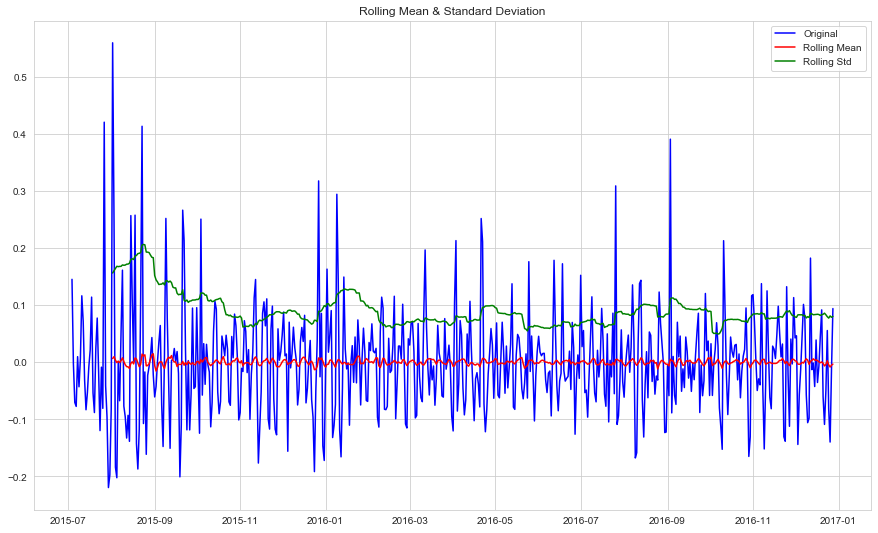

In [15]:
decomp_log = residual
decomp_log.dropna(inplace = True)
decomp_log = pd.DataFrame(decomp_log, index =decomp_log.index )
decomp_log.rename(columns = {'resid': 'visits'}, inplace = True)
test_stationarity(decomp_log)

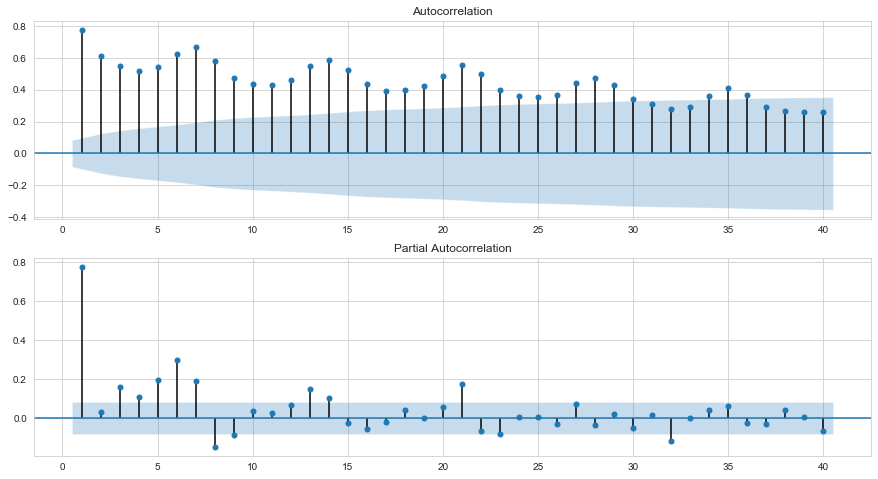

In [16]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(15,8))
fig=sm.tsa.graphics.plot_acf(train_long['visits'], lags= 40,zero= False, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_long['visits'], lags= 40,zero= False, ax=ax[1])
plt.show()

## Data Preparation

### Split the data

In [17]:
split_point = int(len(y)*0.85)
train_y, test_y =  y[:split_point], y[split_point:]
print('Train %d, Test %d' % (len(train_y), len(test_y)))


Train 467, Test 83


## Building machine learning models


### ARIMA

In [45]:
#from pmdarima.arima import auto_arima
from pmdarima import auto_arima
arima_model = auto_arima(train_y,
                      seasonal=True, m=7,
                      d=1, D=7, 
                      start_p= 1, start_q=1,
                      max_p=1,  max_q =7, 
                      max_P=7, max_Q=7,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(arima_model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,7,1,7) [intercept=True]; AIC=977.388, BIC=1001.586, Time=52.467 seconds
Fit ARIMA(0,1,0)x(0,7,0,7) [intercept=True]; AIC=1055.990, BIC=1064.056, Time=8.952 seconds
Fit ARIMA(1,1,0)x(1,7,0,7) [intercept=True]; AIC=926.880, BIC=943.012, Time=47.300 seconds
Fit ARIMA(0,1,1)x(0,7,1,7) [intercept=True]; AIC=704.730, BIC=720.863, Time=24.365 seconds
Fit ARIMA(0,1,0)x(0,7,0,7) [intercept=False]; AIC=1053.992, BIC=1058.026, Time=2.596 seconds
Fit ARIMA(0,1,1)x(0,7,0,7) [intercept=True]; AIC=993.757, BIC=1005.856, Time=5.053 seconds
Fit ARIMA(0,1,1)x(1,7,1,7) [intercept=True]; AIC=982.355, BIC=1002.520, Time=23.950 seconds
Fit ARIMA(0,1,1)x(0,7,2,7) [intercept=True]; AIC=683.662, BIC=703.827, Time=25.993 seconds
Fit ARIMA(0,1,1)x(1,7,2,7) [intercept=True]; AIC=678.749, BIC=702.948, Time=45.492 seconds
Near non-invertible roots for order (0, 1, 1)(1, 7, 2, 7); setting score to inf (at least one inverse root too close to the border of

In [46]:
test_y.columns =['y']

In [47]:
x = arima_model.predict(n_periods=len(test_y))
# x_pred = np.exp(x)
x_pred = x.copy()
x_pred = [int(i) for i in x_pred]
x_pred = pd.DataFrame(x_pred)
x_pred.rename(columns = {0: 'yhat'}, inplace = True)
x_pred.index = test_y.index
x_pred.loc [x_pred.yhat<0, 'yhat'] = 0
x_pred.head()

,yhat
date,
2016-10-10,7
2016-10-11,7
2016-10-12,7
2016-10-13,7
2016-10-14,7


In [49]:
x_pred.describe()

,yhat
count,83.000000
mean,6.746988
std,15.046954
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,90.000000


In [48]:
test_y.describe()

,y
count,83.000000
mean,7.944557
std,0.155732
min,7.615791
25%,7.824841
50%,7.941296
75%,8.082243
max,8.151333


In [34]:
def smape(forecast, test_data):
    """ This method validates SMAPE of the predicted values vs. the actual values from the test set"""
    forecast, test_data  = pd.DataFrame(forecast), pd.DataFrame(test_data)
    test_comp = pd.merge(test_data, forecast, left_index = True, right_index = True)
    denominator = (np.abs(1 - test_comp.yhat / test_comp.y)) / 2.0
    diff = np.abs(test_comp.y - test_comp.yhat) / denominator
    diff[denominator == 0] = 0.0
    smape = np.mean(diff)

    return smape

In [28]:
def mape_func(forecast, test_data):
    """ This method validates MAPE of the predicted values vs. the actual values from the test set
    """
    forecast, test_data  = pd.DataFrame(forecast), pd.DataFrame(test_data)
    test_comp = pd.merge(test_data, forecast, left_index = True, right_index = True)
    mape = np.mean(np.abs(1 - test_comp.yhat / test_comp.y)) * 100
    return mape

In [35]:
# smape test
smape(x_pred, test_y)

15.889114663808675

In [37]:
#mape test
mape_func(x_pred, test_y)

106.05128958746948

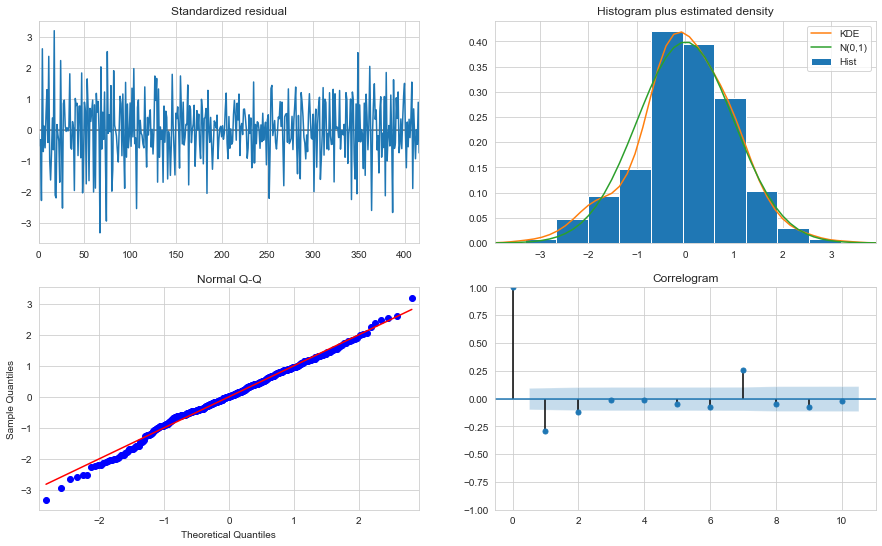

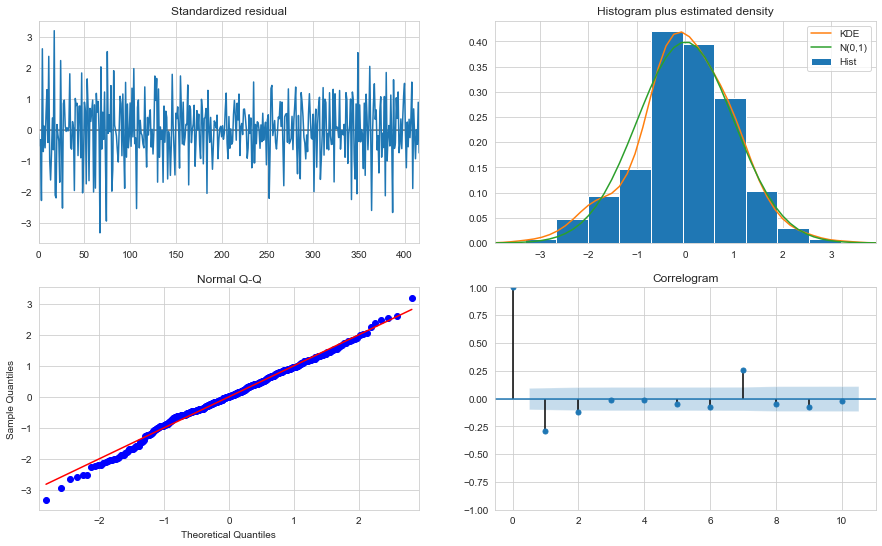

In [38]:
results = arima_model.fit(train_y)
results.plot_diagnostics(figsize=(15, 9))


## Prophet Model 

In [52]:
prophet_raw_data = train_long.copy()
prophet_raw_data.reset_index(inplace = True)
prophet_raw_data.columns = ['ds', 'y']
split_point = int(len(prophet_raw_data)*0.90)
train_pr, test_pr =  prophet_raw_data[:split_point], prophet_raw_data[split_point:]
print('Train %d, Test %d' % (len(train_pr), len(test_pr)))

Train 495, Test 55


Sun Jul 19 15:39:19 CEST 2020


Text(0.5, 1.0, 'Visits to 1918 Flu Pandemic')

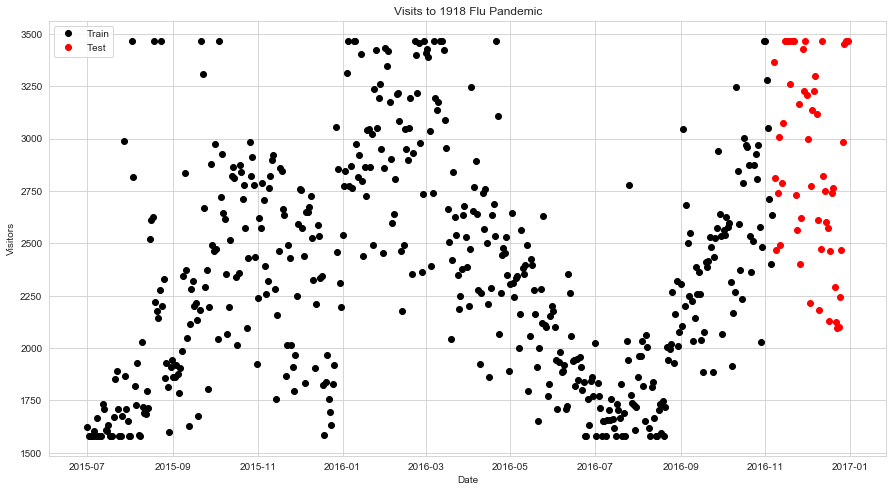

In [53]:
!date
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(train_pr['ds'], train_pr['y'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(test_pr['ds'], test_pr['y'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Visitors')
plt.title ('Visits to 1918 Flu Pandemic')


In [54]:
train_pr.head()

,ds,y
0,2015-07-01,1624
1,2015-07-02,1580
2,2015-07-03,1580
3,2015-07-04,1580
4,2015-07-05,1580


In [55]:
train_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      495 non-null    datetime64[ns]
 1   y       495 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB


In [56]:
!date
from fbprophet import Prophet

Sun Jul 19 15:39:29 CEST 2020


In [68]:
#build model with multiple scale options and choose the best one
# After that, choose the best range based on the result of c 
# and continue to test in the next cell using different scale
!date
# best_result = float('inf')
# for scale in np.arange(0.00,0.10,0.01): 
model=Prophet(growth='linear',n_changepoints=25, changepoint_range=0.8,yearly_seasonality=True,\
              weekly_seasonality= True,daily_seasonality= False,seasonality_mode='additive',\
              changepoint_prior_scale= 0.001,interval_width=0.8)
    
model.fit(train_pr)
future = model.make_future_dataframe(periods=len(test_y)+365,freq="D")
forecast = model.predict(future)

#mean absolute percentage error
error = mape_func(forecast,test_pr)
print(error)
# if error < best_result:
#     best_result = error
#     new_scale = scale
# print("mape: %.4f, scale:%.4f" %(best_result, new_scale))

Sun Jul 19 15:43:44 CEST 2020
11.098686595074335


In [65]:
test_pr.head()

,ds,y
495,2016-11-07,3368
496,2016-11-08,2811
497,2016-11-09,2467
498,2016-11-10,2741
499,2016-11-11,3008


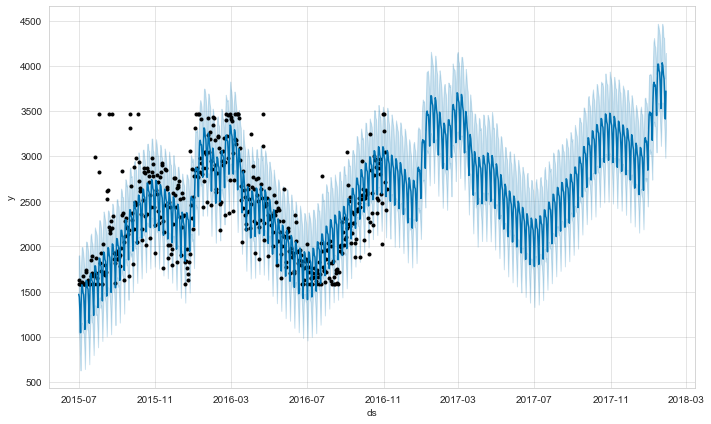

In [69]:
fig = model.plot(forecast)

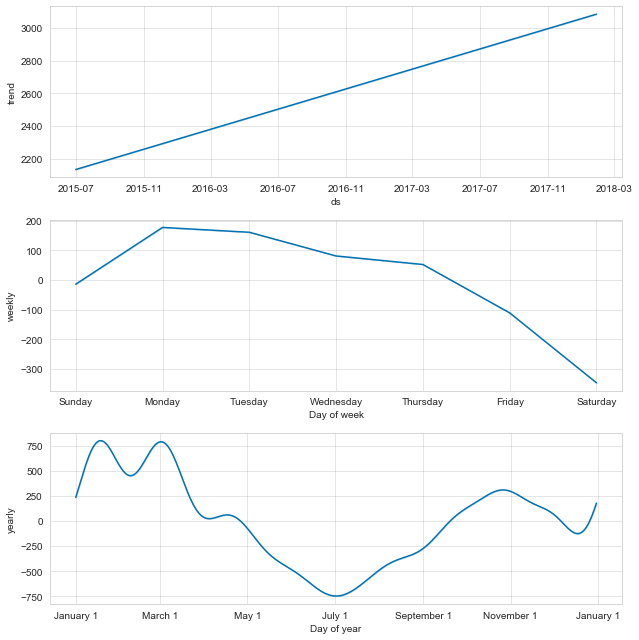

In [70]:
fig_component = model.plot_components(forecast)

In [71]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '120 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-09 00:00:00 and 2016-07-09 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-10,1773.600005,1413.900387,2140.205899,1655,2016-07-09
1,2016-07-11,1964.089582,1589.262537,2326.616201,1704,2016-07-09
2,2016-07-12,1929.910949,1565.746880,2336.245772,1657,2016-07-09
3,2016-07-13,1851.125634,1510.046140,2233.933039,1755,2016-07-09
4,2016-07-14,1828.010693,1432.360148,2218.887980,1661,2016-07-09


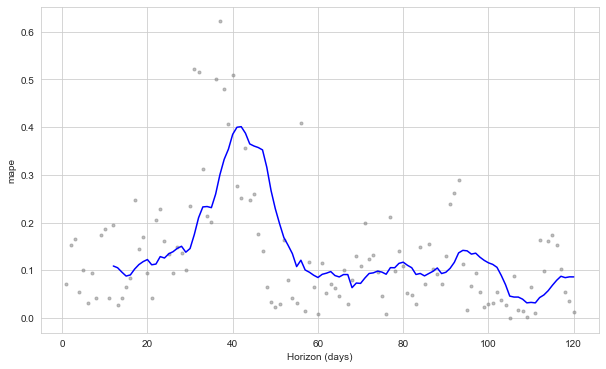

In [72]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')